In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
from datetime import datetime
import sys
#sys.path.append("/KalmanNet_TSP/")
import os
sys.path.append(os.path.join(sys.path[0],'KalmanNet_TSP'))
from KalmanNet_nn import KalmanNetNN
from Extended_data import DataLoader
from msc_filtering import MyKalmanFilterHigherOrder, run_filter
from gen_dataset import gen_dataset

## Neual kalman filtering

In [2]:
[train_input, train_target, cv_input, cv_target, test_input, test_target] = DataLoader('./datasets/steps.pt')

In [3]:
gt_list_1 = [1]*20+[0]*20+[1]*20
measure_list_1 = gt_list_1+0.2*(np.random.rand(len(gt_list_1))-0.5)

In [4]:
a = torch.tensor([1]*20+[0]*20+[1]*20, dtype=torch.float32)
b = torch.tensor([0]*60, dtype=torch.float32)
gt_list_1 = torch.stack([a,b]).repeat(3,1,1)

In [5]:
gt_list_1.shape

torch.Size([3, 2, 60])

In [6]:
torch.roll(torch.tensor(gt_list_1, dtype=torch.float32).repeat(5,1,1),21, dims=2)

C:\Users\marce\AppData\Local\Temp\ipykernel_7068\3609819135.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.roll(torch.tensor(gt_list_1, dtype=torch.float32).repeat(5,1,1),21, dims=2)


tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

#### Investigate features

In [7]:
delta_t = 1

In [8]:
X0 = np.array([0,0])  # position, velocity
P0 = np.array([[1000,0],[0, 1000]])  # Assume no correlation between states
F = np.array([[1, delta_t], [0, 1]])
r = 0.3
q = 0.1
# Piecewiese white noise model
# This noise model assumes white noise on the lambda state (constant over a time cycle)
Q = q*np.array([[(delta_t**4)/4, (delta_t**3)/2],
                [(delta_t**3)/2,   (delta_t**2)]])
H = np.array([1, 0])

In [9]:
firstFilter_rising = MyKalmanFilterHigherOrder(X0, P0, r, Q, F, H)
df_rising_first = run_filter(firstFilter_rising,measure_list_1)
df_rising_first

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr,inno,update,obsv
0,"[0.0, 0.0]","[[2000.025, 1000.05], [1000.05, 1000.1]]","[0.9998500243710398, 0.49994375913913985]","[1.0770682858835487, 0.5385543377196998]","[[0.2999550073112073, 0.14998312774168965], [0...",1.077230,"[1.0770682858835487, 0.5385543377196998]",1.077230
1,"[1.6156226236032487, 0.5385543377196998]","[[0.7749118893177243, 0.3499737542648273], [0....","[0.7209073571691368, 0.32558366666403243]","[1.1091547059184212, 0.30981803748960557]","[[0.21627220715074102, 0.09767509999920973], [...",-0.702542,"[-0.5064679176848275, -0.22873630023009428]",-0.164150
2,"[1.4189727434080268, 0.30981803748960557]","[[0.5063929517884463, 0.21744564463849553], [0...","[0.6279729388325511, 0.2696522137950698]","[1.1364549585167723, 0.18850461549082748]","[[0.1883918816497653, 0.08089566413852092], [0...",-0.449888,"[-0.28251778489125456, -0.12131342199877809]",0.056004
3,"[1.3249595740075997, 0.18850461549082748]","[[0.4383424467217579, 0.1940549009334716], [0....","[0.5936844734689158, 0.262825064162403]","[1.1864351928290158, 0.12717965080278812]","[[0.17810534204067477, 0.0788475192487209], [0...",-0.233330,"[-0.1385243811785839, -0.06132496468803936]",0.122545
4,"[1.3136148436318038, 0.12717965080278812]","[[0.4270945117448668, 0.1951416504554711], [0....","[0.5873988936045383, 0.268385536272546]","[1.1352109743062613, 0.04566601728500276]","[[0.17621966808136152, 0.08051566088176382], [...",-0.303718,"[-0.17840386932554253, -0.08151363351778536]",-0.081733
5,"[1.180876991591264, 0.04566601728500276]","[[0.4308641323678664, 0.19912880340474104], [0...","[0.5895269904297332, 0.27245666408556685]","[1.118573107331927, 0.016871562170236425]","[[0.17685809712891992, 0.08173699922567004], [...",-0.105685,"[-0.06230388425933708, -0.028794455114766335]",0.065296
6,"[1.1354446695021634, 0.016871562170236425]","[[0.4345432396447668, 0.2009481432901768], [0....","[0.5915829269015078, 0.27356884175716806]","[1.106375781792649, 0.003429081699218673]","[[0.17747487807045234, 0.08207065252715041], [...",-0.049137,"[-0.029068887709514435, -0.013442480471017752]",0.011115
7,"[1.1098048634918676, 0.003429081699218673]","[[0.43572490331922636, 0.20117937272162356], [...","[0.5922388943930692, 0.27344374482092676]","[1.0736122037307805, -0.013281499982930895]","[[0.17767166831792078, 0.08203312344627804], [...",-0.061112,"[-0.0361926597610871, -0.016710581682149568]",-0.037614
8,"[1.0603307037478495, -0.013281499982930895]","[[0.43569387392474834, 0.2009890821605495], [0...","[0.592221696234097, 0.27319662332964867]","[0.9808065739216643, -0.049966619558750244]","[[0.17766650887022906, 0.08195898699889459], [...",-0.134281,"[-0.07952412982618529, -0.03668511957581935]",-0.122644
9,"[0.930839954362914, -0.049966619558750244]","[[0.4354810571236658, 0.20085556125454213], [0...","[0.5921037026116674, 0.2730941324852772]","[0.9855120592183655, -0.02475037622031613]","[[0.17763111078350022, 0.08192823974558316], [...",0.092335,"[0.05467210485545149, 0.025216243338434113]",0.097126


plt.plot(df_rising_first.index, np.stack((df_rising_first['xt_curr'].to_numpy()).tolist(), axis=0)[:,0],marker=".",color="black")
plt.plot(df_rising_first.index, measure_list_1 ,marker=".",color="red")
plt.plot(df_rising_first.index, gt_list_1 ,marker=".",color="g")
plt.title("Constant rise - first order kalman filter")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.twinx()
plt.scatter(df_rising_first.index, np.stack((df_rising_first['k_gain'].to_numpy()).tolist())[:,0], marker="*",color="black")
plt.ylabel("Kalman gain")
plt.ylim([0,1])
plt.show()

plt.plot(df_rising_first.index, np.stack((df_rising_first['inno'].to_numpy()).tolist(), axis=0),marker=".",color="orange")
plt.plot(df_rising_first.index, np.stack((df_rising_first['obsv'].to_numpy()).tolist(), axis=0),marker=".",color="cyan")
plt.plot(df_rising_first.index, measure_list_1 ,marker=".",color="red")
plt.plot(df_rising_first.index, gt_list_1 ,marker=".",color="g")
plt.title("Constant rise - first order kalman filter")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.twinx()
plt.scatter(df_rising_first.index, np.stack((df_rising_first['k_gain'].to_numpy()).tolist())[:,0], marker="*",color="black")
plt.ylabel("Kalman gain")
plt.ylim([0,1])
plt.show()

#### Training data read

In [10]:
[train_input, train_target, cv_input, cv_target, test_input, test_target] = DataLoader('./datasets/steps.pt')

In [11]:
sequence_no = 270
plot_data = train_input[sequence_no][0].cpu().numpy()
plot_gt = train_target[sequence_no][0].cpu().numpy()
steps = np.arange(plot_data.shape[0])

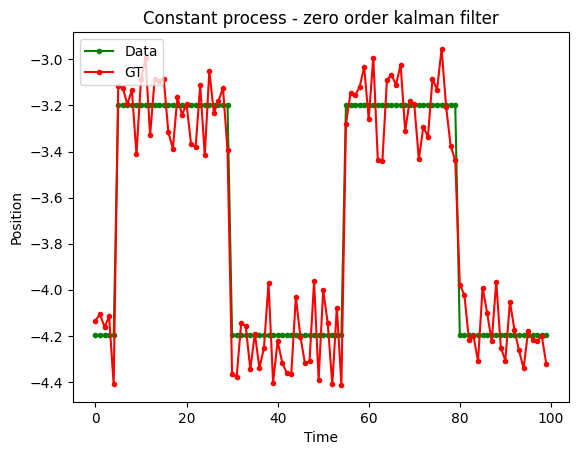

In [12]:
plt.plot(steps, plot_gt ,marker=".",color="green")
plt.plot(steps, plot_data,marker=".",color="red")
plt.title("Constant process - zero order kalman filter")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(["Data","GT"],loc='upper left')
plt.show()

#### Try model

In [13]:
dev = torch.device("cpu")
torch.cuda.is_available()

True

In [14]:
today = datetime.today()
now = datetime.now()
strToday = today.strftime("%m.%d.%y")
strNow = now.strftime("%H:%M:%S")
strTime = strToday + "_" + strNow

In neural kalman filtering the idea is to learn the gain. 

In [15]:
model = torch.load('./models/model_KNet_steps.pt')
model.eval()

KalmanNetNN(
  (KG_l1): Linear(in_features=4, out_features=320, bias=True)
  (KG_relu1): ReLU()
  (rnn_GRU): GRU(320, 80)
  (KG_l2): Linear(in_features=80, out_features=16, bias=True)
  (KG_relu2): ReLU()
  (KG_l3): Linear(in_features=16, out_features=4, bias=True)
  (sig_l3): Sigmoid()
)

In [16]:
model.InitSequence(torch.tensor([[0],[0]],dtype=torch.float32))
model.init_hidden()

gt_list_4 = [1]*25+[0]*25+[1]*25+[0]*25
amp = 0.6
var = (amp/3)**2
measure_list_4 = gt_list_4+amp*(np.random.rand(len(gt_list_4))-0.5)

In [17]:
res = []
k_ = []
t_ = []
for step, item in enumerate(train_input[sequence_no].T):
    #inp = torch.tensor([item,0],dtype=torch.float32)
    #out = model.forward(inp.float())
    out = model.forward(item)
    res.append(out.cpu().detach().numpy()[0])
    k_.append(model.KGain.cpu().detach().numpy()[0][0])
    t_.append(step)

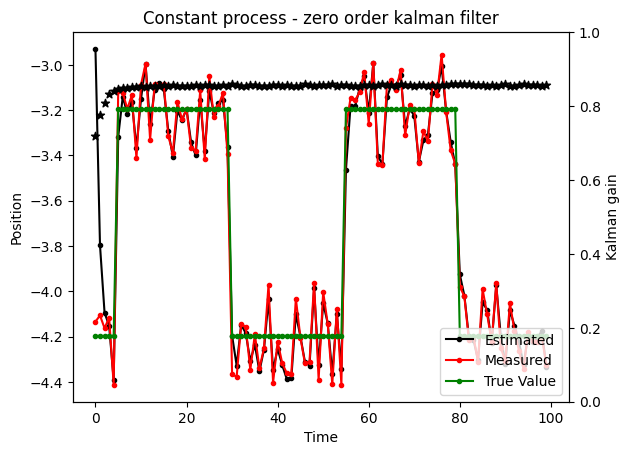

In [18]:
plt.plot(t_, res ,marker=".",color="black")
plt.plot(t_, train_input[sequence_no][0].cpu().detach().numpy() ,marker=".",color="red")
plt.plot(t_, train_target[sequence_no][0].cpu().detach().numpy() ,marker=".",color="g")
plt.title("Constant process - zero order kalman filter")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(["Estimated","Measured","True Value"],loc='lower right')
plt.twinx()
plt.scatter(t_, k_,marker="*",color="black")
plt.ylabel("Kalman gain")
plt.ylim([0,1])
plt.show()